# Digital Image Processing - HW10 - 98722278 - Mohammad Doosti Lakhani
In this notebook, I have solved the assignment's problems which are as follows:
1. Answer following questions:
    1. Why Convolutional Neural Networks have been used for image processing instead of fully connected neural networks?
    2. What are the benefits of using Pooling layer?
    3. What is the role of non-linear activation functions such as sigmoid and tanh? Is it possible to use linear activation functions?
    4. What is the main reason that number of parameters in *GoogleNet* with 22 layers are much less than *AlexNet* with 8 layers?
    
2. Summarize [Xception](http://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf) model
    1. LeNet
    2. AlexNet
    3. VGG
    4. ResNet
    5. Inception (GoogleNet)
    5. Xception

3. Train a [Keras](https://keras.io/) model on CIFAR10 dataset and report accuracy and Confusion Matrix
    1. Libraries
    2. Preparing Data
        1. Loading
        2. Normalizing
        3. Onehot Vector For Labels
    3. Setting Hyperparameters
    4. Learning Rate Decay Callbacks
    5. Defining ResNet110V2
    6. Compile Model
    7. Save Model Callbacks
    8. Cutout Regularization
    9. ImageDataGenerator
    10. Train Model
    11. Evaluate Model
        1. Last Model
        2. Best Model
        3. Confusion Matrix of Best Model
    12. 10 Worst Predictions

## 1 Answer following questions:
1. Why Convolutional Neural Networks have been used for image processing instead of fully connected neural networks?
2. What are the benefits of using Pooling layer?
3. What is the role of non-linear activation functions such as sigmoid and tanh? Is it possible to use linear activation functions?
4. What is the main reason that number of parameters in *GoogleNet* with 22 layers are much less than *AlexNet* with 8 layers?


Image credits mainly from the coresponding papers and [this](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)

### 1.A CNN vs FCN

The major reason of introducing CNNs is that FCNs combine all features by connecting all neurons in each layer to the all neurons of next layer while CNNs incorporate spatial features regarding of position of filters w.r.t. to input layers. Also CNNs preserve receptive fields regarding different sizes of filters which cannot be obtained in any form of fully connected neural networks. In other words, each neuron in CNN only is connected to a small chunk of input image.

Other major reason is the processing manners. CNNs can learn much more features with less number of parameters as FCNs cannot properly learn spatial features. Also because CNNs are smaller in term of features, they are fast too.

### 1.B Why Pooling layer

In summary, images are huge in size and number of features before passing them to any network. So when we start to train a network, after learning some feautures using convolutional layers, still we have huge matrix in term of spatial size so the best way to reduce considering local connectivity (each neuron only is connceted to small chunk of input image) is to taking pooling such as max or average.

The reason that this approach works is that in high spatial size matrices, a neuron can represent its locality as it is the feature of images where pixels are patially relative, so pooling just retain the most dominant information and exlcude all duplicate info which can be ignored.

### 1.C Why non-linear Activation Functions?

In term of computing convolution of FCN, logic is same, we have `w*x` for a single layer. Now let's have 3 layers. Here is the forward operation considering weights are optimal: `w3*w2*w1*x`.

As we can see all the operations are linear between layers so we can reduce `w3*w2*w1` to `w` as convolution of multiple matrices are still linear. So the main idea of neural networks that can learn non-linearity of data has been gone!

To prevent this problem from happening, we had a non-linear function such as sigmoid or tanh to help eliminating linearity between each layer. Note that if we use linear functions, still convolving different matrices will be linear.

### 1.D 7M Paremeters InceptionV1 model vs. 56M parameters AlexNet

It is better to have an intuition of network before explaining the difference.

AlexNet:

![alex net arch](wiki/1_d_1.png)

Convolution layers in both networks almost have same amount of parameters and because *Inception V1* a.k.a. *GoogLeNet* has more conv layers, it has more parameters excluding fully connected parts.

In term of convolution parameters:
1. Inception: 3.2M
2. AlexNet: 2.5M

But what makes this huge difference is the connection between conv layers and fully connected layers and also the connection between fully connected layers itself.

In *AlexNet*, the connection between last pooling layer and first fully connected layer has about 37M parameters and on top of it, the connection between this layer and next fully connected layer has 16M parameters too so only these 2 layers of 8-layer AlexNet have more than 54M parameteres while the entire *Inception* model has 7M parameters which has been explained later. Here is an image of last pooling layer and 2 fully connected layers of *AlexNet*:

![alex net last fcn](wiki/1_d_3.png)

What about *Inception*? 
Inception V1:

![inception v1](wiki/1_d_2.png)

About *Inception* we need to focus on two procedure:
1. `1x1` Convs: As we know in Inception module, different convs have been taken and then concatnated but before doing this, they first take `1v1` conv for sake of dimensionality reduction.

2. Using `GlobalAveragePooling` in the last layer after Inception layers helped to reduce the last convotional layer to only 1024, then a fully connected with 1000 neurons are connected at the last layer.

Note that there are 2 other auxiliry losses with same logic (after Inception4a and Inception 4d) so approximately all three pathes have about 3M parameters + 3.2M parameters of inception modules and other conv layers, we reach 7M parameters. 

![aux loss](wiki/1_d_4.png)

Image above shows the dimensionality of different layers at the connection of conv layers to fully connected for auxility loss 1. This is same for aux loss 2 except tensor after avg pooling is `4x4x528` instead of `4x4x512x`.

Below image also show the main path (main loss) of GoogleNet:

![main path](wiki/1_d_5.png)

## 2 Summarize [Xception](http://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf) model
1. LeNet
2. AlexNet
3. VGG
4. ResNet
5. Inception (GoogleNet)
5. Xception


Note: In all modules, circles with *T=Tanh*, *S=Sigmoid* and *R=ReLU*

### 2.A LeNet
LeNet is simplest neural network here, just 2 conv layer and 3 FCs. This model has only 0.6M parameters.

![lenet](wiki/2_1.png)

### 2.B AlexNet

AlexNet has 8 layers. What is interesting about this network is that the idea of stacking multiple convolutions then reducing the spatial size of filters has been introduced which is commonly used in almost all networks. The other important note is that they introduced ReLU activation in this paper.

This model has huge capacity with 60M parameters and at the time of publishing, implementing this using available GPUs was challenge so they used parallel implementation of different operation that led them win challenges.

![alex net](wiki/2_2.png)

### 2.C VGG
VGG has two main difference from AlexNet
1. VGG uses smaller filter sizes like 2x2 or 3x3 instead of using big ones like 11x11 at first then reduing the filter sizes and reducing volume sizes has been taken care of by maxpooling layers.
2. VGG is much deeper and the reason is that in the corresponding paper (or many books) it has been shown that deeper and bigger neural networks has more capacity to learn, so why not deeper?!

They stacked much more layers of smaller filter sizes so as we can guess number of parameters increased to 138M.
VGG has different models that a number follows the name VGG which demonstrates number of layers of model. Most reknown ones are VGG-16 and VGG-19.

Something is good to know is that in many different tasks, people use intermediate layers of VGG trained on ImageNet as latent vector of feature extractor or directly transfering knowledge from VGG model for their particular tasks.

![VGG](wiki/2_3.png)

This one may show much better:

![VGG 2](wiki/2_4.png)

### 2.D ResNet
The resnet's idea is really simple in intuitive way, "go deeper and deeper but you might forget what you have learned before, so every time you go deeper, try to learn new thing, if you cannot, retain what ever you have had so far (by identity function!)".

Actually I made up the sentence above but it is absolutely true about ResNet. Here is an image that helps:

![resnet bottleneck](wiki/2_5.png)

The other parts are similar to any other networks, stacking up multiple layers but this time, we stack everytime a single one of aforementioned layers called ResNet block(bottleneck). The straight lines works as identity function in simplified terms called skipping connections.

This architecture helps scientists to build much deeper networks from 20 layers to nowadays 1000 layers with increase in accuracy by increasing layers thanks to those micro-architectures(resnet blocks).

Because ResNet also uses global average pooling(we can see similar effect in Inception module) the number of parameters is much less than AlexNet. For instance, ResNet-50 with 50 layers has only 26M parameters.

![resnet arch](wiki/2_6.png)

### 2.E Inception-V1
please see section 1.D

### 2.F Xception


The first point I would like to focus on is that *Xception* only not introduces new artichtecture, it also depicts a new approach of taking convolutions called *Depthwise separable convolutions* which is enormously faster than normal convolution we knew from other models such as *ResNet*, *VGG*.

What is *depthwise convolution*? Multiplication is a expensive operation for computer and in a normal convolution for a image with size of `H*H*M` and `N` filters with size of `K*K*M`, the number of multiplication will be `N*(H-K)^2*K^2*M`.

*Depthwise separable convolution* has two steps:
1. Depthwise convolution: Only applies convolution to a channel at a time rather than all channels so we need `M` filter with size of `K*K*1` too. The output size of this step will be in size of `(H-K)^M` which needs `M*K^2*(H-K)^2` multiplications.
2. Pointwise convolution: Linear combination of these layers with a filter with size of `1*1*M`. Assume as normal convolution we need `N` filters so we can exapnd the idea here too. The output of this step will be in size of `N*(H-K)^2` which needs `N*(H-K)^2*M` multiplications.

Finally, the speedup is equal to `(1/N) + (1/K^2)`.

In summary, we have same ratio for number of parameters too which is big deal. 
This image may help to understand the operation:

![depthwise separable convoltuions](wiki/3_1.png)

Now we focus on *Xception* module. In *Xception* the order of operations in depthwise separable convolutions has been reversed which means first `1*1` convolutions have been used like below image:

![simplified inception module](wiki/3_3.png)

Xception is the extended version of Inception-V3 (in term of number of stacked layers) but the main difference as has been explained is using *depthwize separable convolutions* *eXtreme*ly which is exactly as the way I have explained in mathematically. The other parts are very similar to Inception and convetional CNNs. 

This model has about 23M parameters.

Here is the final model:

![Xception](wiki/2_7.png)

## 3 Train a [Keras](https://keras.io/) model on CIFAR10
1. Libraries
2. Preparing Data
    1. Loading
    2. Normalizing
    3. Onehot Vector For Labels
3. Setting Hyperparameters
4. Learning Rate Decay Callbacks
5. Defining ResNet110V2
6. Compile Model
7. Save Model Callbacks
8. Cutout Regularization
9. ImageDataGenerator
10. Train Model
11. Evaluate Model
    1. Last Model
    2. Best Model
    3. Confusion Matrix of Best Model
12. 10 Worst Predictions

### 3.A Libraries

In [ ]:
%tensorflow_version 1.x

from __future__ import print_function   
import seaborn as sns
import matplotlib.pylab as plt
import PIL
import pandas as pd
import numpy as np
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.regularizers import l2
from keras.models import Model
from keras.utils import to_categorical
import keras

from keras.datasets import cifar10 

### 3.B Preparing Data
1. loading
2. normalizing
3. converting labels to onehot vectors

#### 3.B.a Loading

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


#### 3.B.b Normalizing

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print('train samples', x_train.shape[0])
print('test samples', x_test.shape[0])
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
train samples 50000
test samples 10000
y_train shape: (50000, 1)


#### 3.B.c Convert Y to onehot vectors

In [8]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)

(50000, 10)


### 3.C Setting Hyperparameters

In [ ]:
batch_size = 32
epochs = 200

data_augmentation = True
subtract_pixel_mean = True

# resnet 110 v2
depth = 110  
version = 2 
model_type = 'ResNet110v2'

In [ ]:
input_shape = x_train.shape[1:]

### 3.D Learning Rate Decay Callbacks

In [ ]:
def lr_schedule(epoch):
    """
    Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    
    :param epoch: The number of epochs

    :Returns: lr (float32) learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

### 3.E Defining ResNet110V2

In [ ]:
def resnet_layer(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu', batch_normalization=True, conv_first=True):
    """2D Convolution-Batch Normalization-Activation block

    :param inputs (tensor): input tensor from input image or previous layer
    :param num_filters (int): Conv2D number of filters
    :param kernel_size (int): Conv2D kernel dimensions
    :param strides (int): Conv2D stride dimensions
    :param activation (string): activation name
    :param batch_normalization (bool): whether to include batch normalization
    :param conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)

    :return: x (tensor) tensor as input to the next layer
    """
    conv = Conv2D(num_filters, kernel_size=kernel_size, strides=strides, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x



def resnet110v2(input_shape, num_classes=10):
    """
    ResNet Version 2 Model

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    :param input_shape (tensor): shape of input tensor
    :param num_classes (int): number of classes

    
    :return: Keras model instance
    """

    # Start model definition.
    num_filters_in = 16
    num_res_blocks = 12

    inputs = Input(shape=input_shape)

    x = resnet_layer(inputs=inputs, num_filters=num_filters_in, conv_first=True)

    # Instantiate the resnet blocks
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2

            # resnet blocks
            y = resnet_layer(inputs=x, num_filters=num_filters_in, kernel_size=1, strides=strides, activation=activation, 
                             batch_normalization=batch_normalization, conv_first=False)
            y = resnet_layer(inputs=y, num_filters=num_filters_in, conv_first=False)
            y = resnet_layer(inputs=y, num_filters=num_filters_out, kernel_size=1, conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                x = resnet_layer(inputs=x, num_filters=num_filters_out, kernel_size=1, strides=strides, activation=None, batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # add classifier
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

    # instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model


### 3.F Compile Model

In [ ]:
model = resnet110v2(input_shape=input_shape)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr_schedule(0)), metrics=['accuracy'])
model.summary()
print(model_type)

Learning rate:  0.001
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_454 (Conv2D)             (None, 32, 32, 16)   448         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_440 (BatchN (None, 32, 32, 16)   64          conv2d_454[0][0]                 
__________________________________________________________________________________________________
activation_440 (Activation)     (None, 32, 32, 16)   0           batch_normalization_440[0][0]    
______________________________________________________________________

### 3.G Save Model Callbacks

In [ ]:
import os
def prepare_directory(model_type):
    save_dir = os.path.join(os.getcwd(), 'saved_model')
    model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, model_name)
    return filepath

filepath = prepare_directory(model_type)

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True)

gather all callbacks

In [ ]:
callbacks = [checkpoint, lr_reducer, lr_scheduler]

set ImageDataGenerator to use data augmentation

### 3.H Cutout Regularization

In [ ]:
import numpy as np
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()
        if p_1 > p:
            return input_img
        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break
        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)
        input_img[top:top + h, left:left + w, :] = c
        return input_img
    return eraser

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


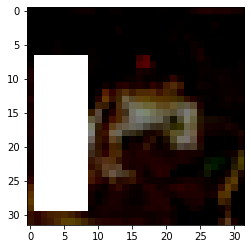

In [ ]:
from copy import deepcopy
z = deepcopy(x_train[0])
plt.imshow(get_random_eraser()(z))

### 3.I ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest',
        cval=0.,
        zoom_range=0.1,
        horizontal_flip=True,
        rescale=None,
        preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

datagen.fit(x_train)

### 3.J Train Model

In [89]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    validation_data=(x_test, y_test), epochs=epochs, verbose=1, workers=4, callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
Learning rate:  0.001
1563/1563 [==============================] - 736s 471ms/step - loss: 2.5089 - acc: 0.4288 - val_loss: 1.9985 - val_acc: 0.4653

Epoch 00001: val_acc improved from -inf to 0.46530, saving model to /content/saved_model/cifar10_ResNet110v2_model.001.h5
Epoch 2/200
Learning rate:  0.001
1563/1563 [==============================] - 668s 428ms/step - loss: 1.6728 - acc: 0.5514 - val_loss: 1.8591 - val_acc: 0.5046

Epoch 00002: val_acc improved from 0.46530 to 0.50460, saving model to /content/saved_model/cifar10_ResNet110v2_model.002.h5
Epoch 3/200
Learning rate:  0.001
1563/1563 [==============================] - 661s 423ms/step - loss: 1.4663 - acc: 0.6035 - val_loss: 1.7155 - val_acc: 0.5433

Epoch 00003: val_acc improved from 0.50460 to 0.54330, saving model to /content/saved_model/cifar10_ResNet110v2_model.003.h5
Epoch 4/200
Learning rate:  0.001
1563/1563 [=

### 3.K Evaluate Model
1. Last Model
2. Best Model
3. Confusion Matrix of Best

#### 3.K.a Last Model

In [90]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 25s 2ms/step
Test loss: 0.8169160022735595
Test accuracy: 0.8198


#### 3.K.b Best Model

In [11]:
from keras.models import load_model
best_model = load_model('drive/My Drive/IUST-DIP/cifar10_ResNet110v2_model.039.h5')
scores = best_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 13s 1ms/step
Test loss: 0.6827598980903625
Test accuracy: 0.8486


#### 3.K.c Confusion Matrix of Best Model

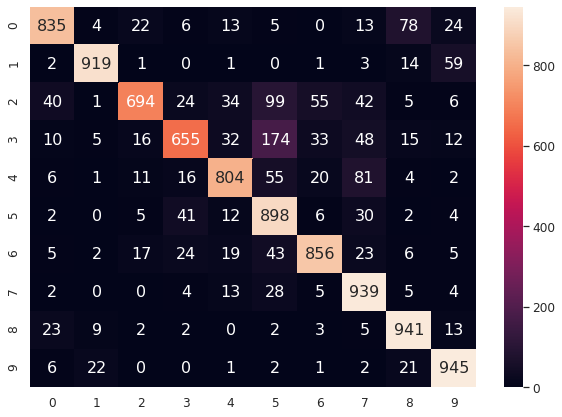

In [28]:
from sklearn.metrics import confusion_matrix
pred = best_model.predict(x_test, verbose=1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred, axis=-1))

df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')

plt.show()

### 3.L 10 Worst Predictions

In [ ]:
wrongs = np.argmax(best_model.predict(x_test), axis=-1) != np.argmax(y_test, axis=-1)
wrongs_idx = (wrongs*1).nonzero()[0]
wrongs_probs = best_model.predict(x_test[wrongs_idx])
wrongs_true_prob = np.diag(wrongs_probs[:, np.argmax(y_test, axis=-1)])
worst_preds_idx = np.argpartition(wrongs_true_prob, 10)[:10]
worst_preds_idx = wrongs_idx[worst_preds_idx]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Predicted: 0 ------ True class 9
Predicted: 9 ------ True class 1
Predicted: 9 ------ True class 1
Predicted: 9 ------ True class 1
Predicted: 7 ------ True class 4
Predicted: 5 ------ True class 4
Predicted: 1 ------ True class 9
Predicted: 9 ------ True class 0
Predicted: 5 ------ True class 3
Predicted: 9 ------ True class 1


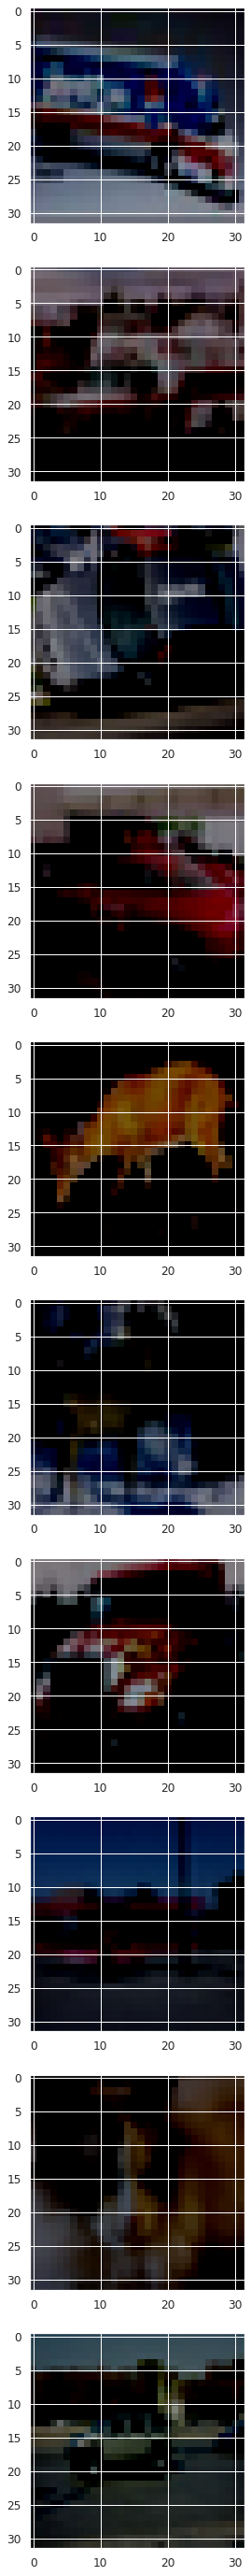

In [94]:
fig = plt.figure(figsize=(50, 50))  # width, height in inches

for i, idx in enumerate(worst_preds_idx):
    sub = fig.add_subplot(len(worst_preds_idx), 1, i + 1)
    sub.imshow(x_test[idx,:,:], interpolation='nearest')
    print('Predicted:', np.argmax(pred[idx], axis=-1), '------ True class', np.argmax(y_test[idx], axis=-1))